### analisis individual
en base a los resultados del anterior notebook sabemos que los productos de exportacion no tradicionales mas relevantes de Bolivia, son la harina de soya con codigo cuci 813 y el aceite de soya con codigo 4211, por lo tanto se procede a ver sus principales caracteristicas

In [1]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We read the data frame data from the previus notebook
df_expo = pd.read_csv(r'./exportaciones_1992_2022.csv.zip', compression='zip', header=0, sep=',')
df_expo.columns

Index(['GESTION', 'MES', 'FLUJO', 'NANDINA', 'DESNAN', 'PAIS', 'DESPAIS',
       'MEDI', 'DESMEDI', 'VIASAL', 'DESVIA', 'DEPART', 'DESDEP', 'CUCI3',
       'DESCUCI3', 'GCE3', 'DESGCE3', 'CIIUR3', 'DESCIIU3', 'CLTNT', 'KILBRU',
       'VALOR'],
      dtype='object')

In [7]:
# we define this style for the plots
plt.style.use('fivethirtyeight')

In [9]:
# Definimos esta funcion para generar una grafica de la evolucion individual de cada producto
def cuci_expo(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION'])[col].sum().div(1000000).reset_index()
  df.fillna(0, inplace=True)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Exports (1992 - 2021)')
  axes.plot(df['GESTION'], df[col])
  axes.set_xlabel('Year') 
  if col == 'VALOR':
    axes.set_ylabel('Millon of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thousand Tons')
  return plt.show()

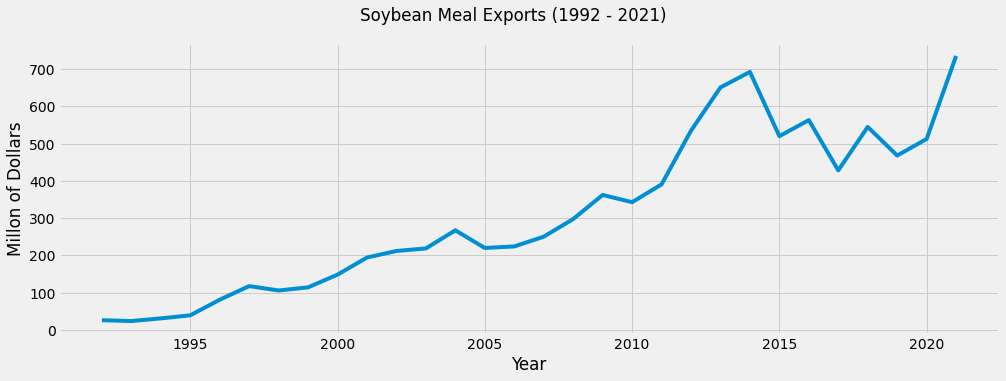

In [10]:
# visualizamos la evolucion del precio de la harina de soya
cuci_expo(df_expo, 813, 'VALOR', 'Soybean Meal')

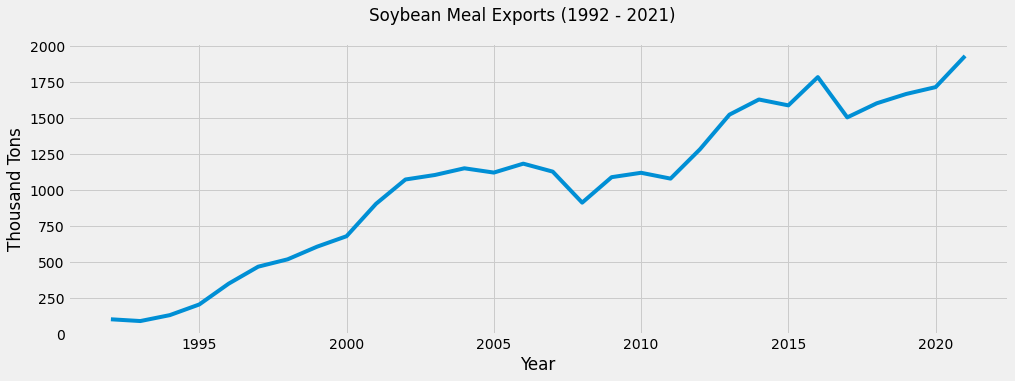

In [11]:
cuci_expo(df_expo, 813, 'KILBRU', 'Soybean Meal')

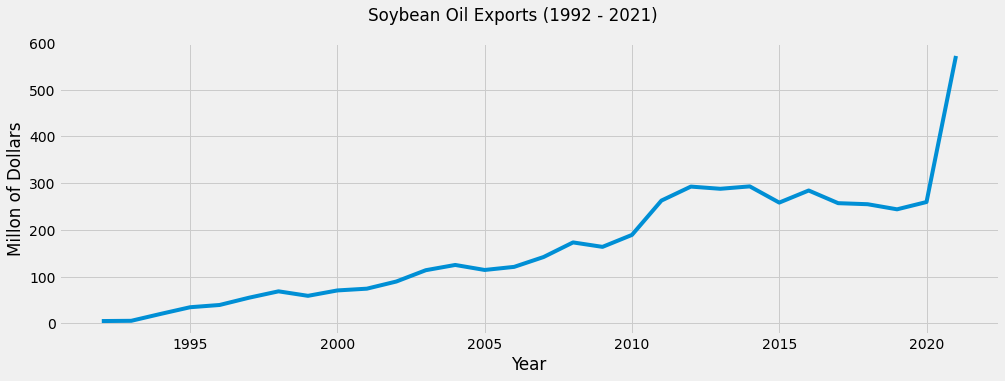

In [12]:
#continuamos explorando el aceite de soya
cuci_expo(df_expo, 4211, 'VALOR', 'Soybean Oil')

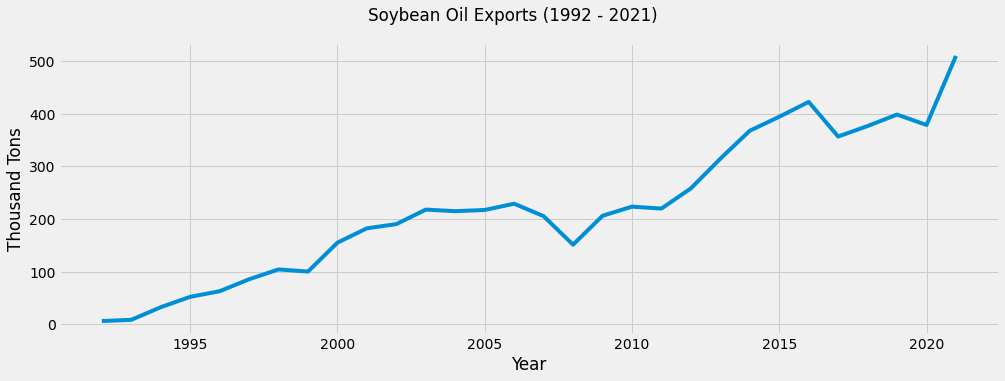

In [13]:
cuci_expo(df_expo, 4211, 'KILBRU', 'Soybean Oil')

In [28]:
# la siguiente funcion sirve para ver en grafico de cajas la evolucion ya sea por año o por mes del producto
def cuci_box(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='MES', columns='GESTION', fill_value=0).div(1000000).round(3)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Exports Evolution (1992 - 2021)')
  years = df['GESTION'].unique()
  axes.boxplot(df_aux)
  axes.set_xticklabels(years,rotation=45)
  axes.set_xlabel('Year') 
  if col == 'VALOR':
    axes.set_ylabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thousand Tons')
  return plt.show()


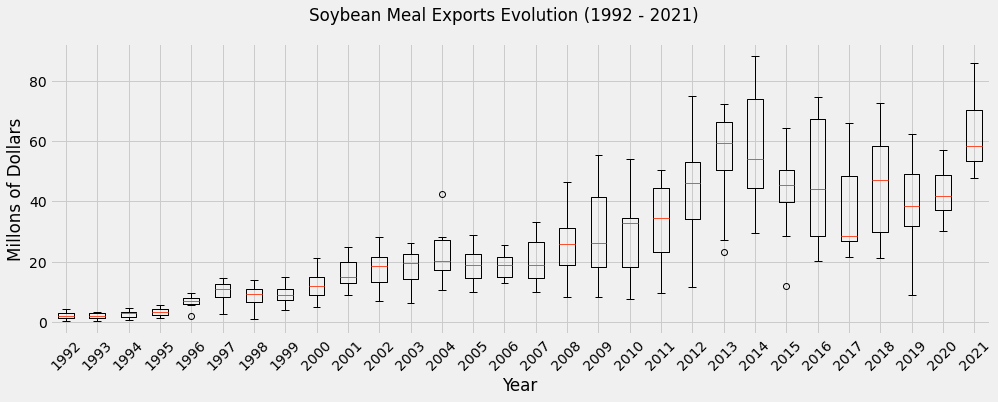

In [29]:
cuci_box(df_expo, 813, 'VALOR', 'Soybean Meal')

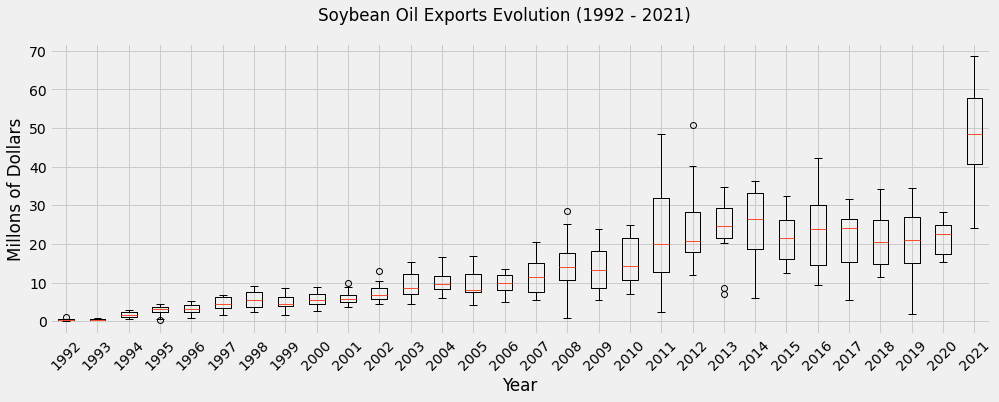

In [30]:
cuci_box(df_expo, 4211, 'VALOR', 'Soybean Oil')

In [31]:
# la siguiente funcion sirve para ver en grafico de cajas la evolucion ya sea por mes del producto
def cuci_box_month(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='GESTION', columns='MES', fill_value=0).div(1000000).round(3)
  meses=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'Octuber', 'November', 'December']
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Exports Evolution (1992 - 2021)')
  axes.boxplot(df_aux)
  axes.set_xticklabels(meses, rotation=45)
  axes.set_xlabel('Month') 
  if col == 'VALOR':
    axes.set_ylabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thousand Tons')
  return plt.show()

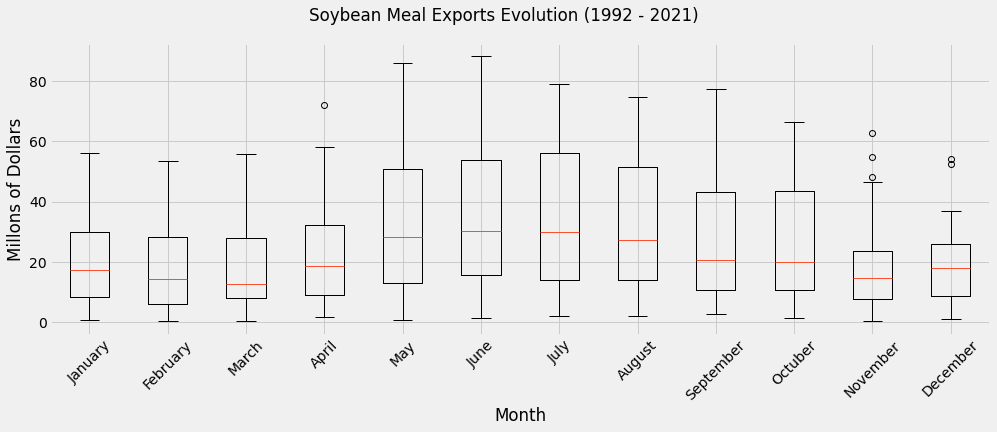

In [32]:
cuci_box_month(df_expo, 813, 'VALOR', 'Soybean Meal')

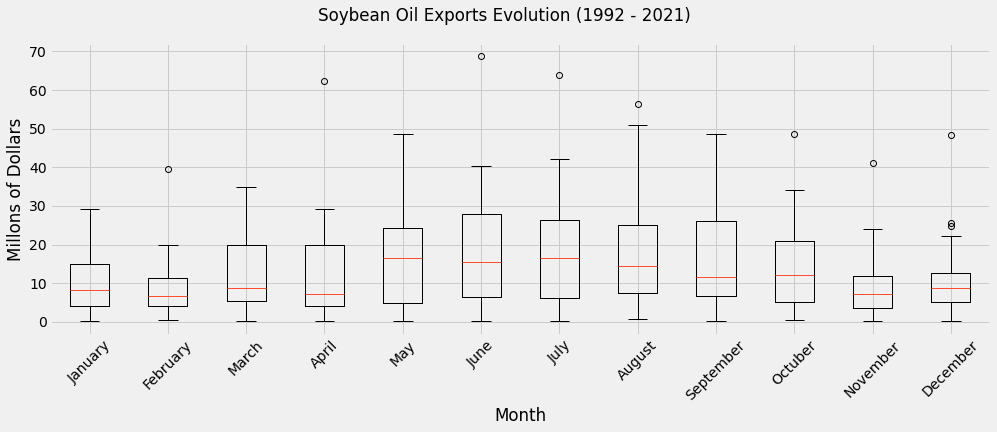

In [33]:
cuci_box_month(df_expo, 4211, 'VALOR', 'Soybean Oil')

In [34]:
# se elabora la funcion para tener un diagrama de dispersion para ver la relación entre valor y volumen
def scatter_cuci(df, cuci, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df = df.loc[:,['VALOR', 'KILBRU']].div(1000000).fillna(0)
  fig, axes = plt.subplots(figsize=(5, 5))
  fig.suptitle(nombre + ' Value and Volume correlation (1992 - 2021)')
  axes.scatter(x=df['VALOR'], y=df['KILBRU'])
  axes.set_xlabel('Millons of Dollars') 
  axes.set_ylabel('Thousand Tons')
  return plt.show()

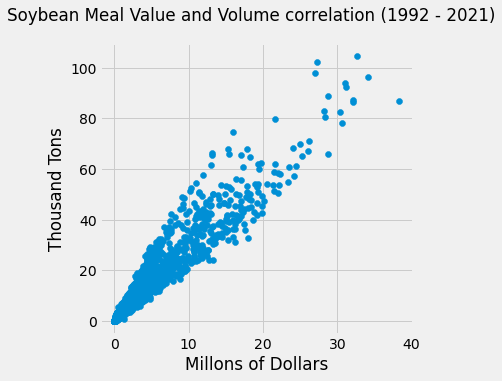

In [35]:
scatter_cuci(df_expo, 813, 'Soybean Meal')

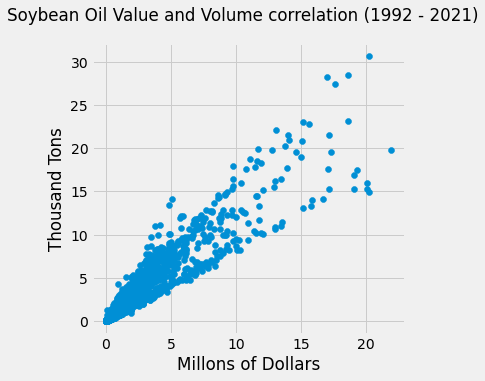

In [36]:
scatter_cuci(df_expo, 4211, 'Soybean Oil')

la siguiente funcion sirve para generar histogramas y ver la distribucion que tienen tanto la harina de soya como el aceite de soya

In [39]:
def hist_unit(df, cuci, nombre, limite):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000)) 
  df = df[df['UNITARIO'] < limite]
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Export Distribution (1992 - 2021)')
  axes.hist(df['UNITARIO'], bins=100)
  axes.set_xlabel('Dollars/Ton') 
  axes.set_ylabel('Count')
  plt.show()
  return print(df['UNITARIO'].median())

C:\Users\Windows\AppData\Local\Temp/ipykernel_35512/2829236023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


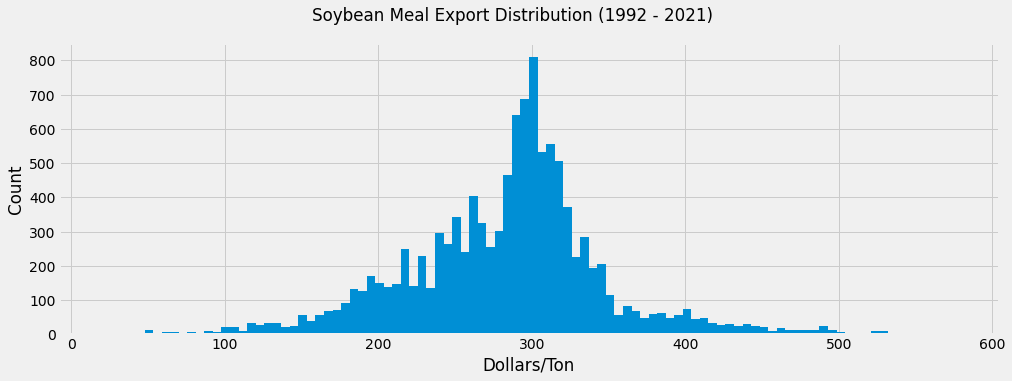

291.5900448430493


In [40]:
hist_unit(df_expo, 813, 'Soybean Meal', 600)

C:\Users\Windows\AppData\Local\Temp/ipykernel_35512/2829236023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


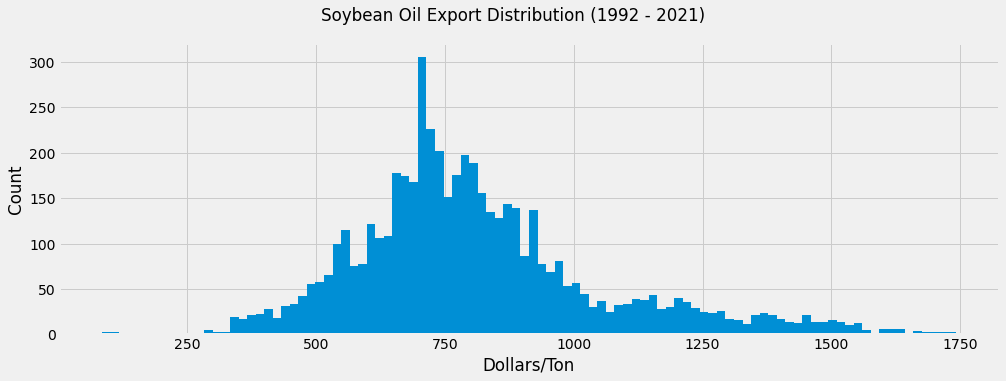

771.999375


In [41]:
hist_unit(df_expo, 4211, 'Soybean Oil', 1800)

hacemos una funcion para vere en barras de columnas los medios las vias y los paises donde va mas seguido la harina de soya y el aceite de soya

In [48]:
def h_bar_plot(df, cuci, col, hue, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby([hue])[col].sum().div(1000000).reset_index().sort_values(by=col, ascending=False)[:10]
  #df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby([hue])[col].sum().div(1000000).sort_values(ascending=False).reset_index(drop=True)
  fig, axes = plt.subplots()  
  sns.barplot(y=hue, x=col, data=df, ax=axes)
  if hue == 'DESVIA':
    axes.set_ylabel('Exit Route')
    fig.suptitle(nombre + ' principal exit routes (1992 - 2021)')
  elif hue == 'DESPAIS':
    axes.set_ylabel('Country')
    fig.suptitle(nombre + ' principal buyers (1992 - 2021)')
  elif hue == 'DESMEDI':    
    axes.set_ylabel('Transport')
    fig.suptitle(nombre + ' principal transport(1992 - 2021)')
  if col == 'VALOR':
    axes.set_xlabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_xlabel('Thousand Tons')
  return plt.show()

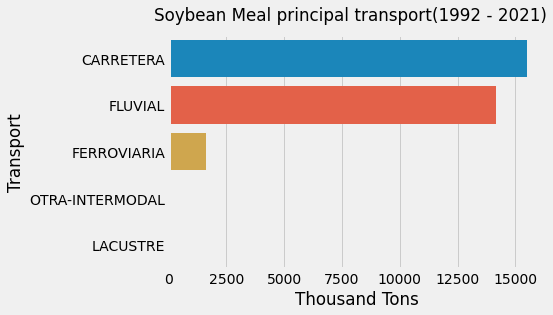

In [43]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESMEDI', 'Soybean Meal')

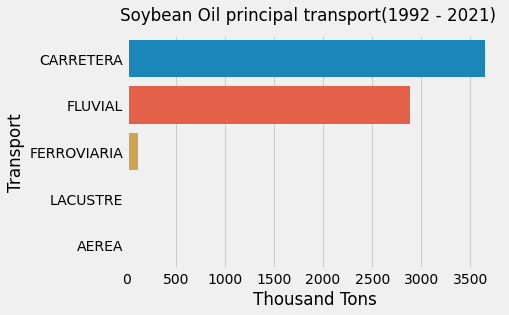

In [44]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESMEDI', 'Soybean Oil')

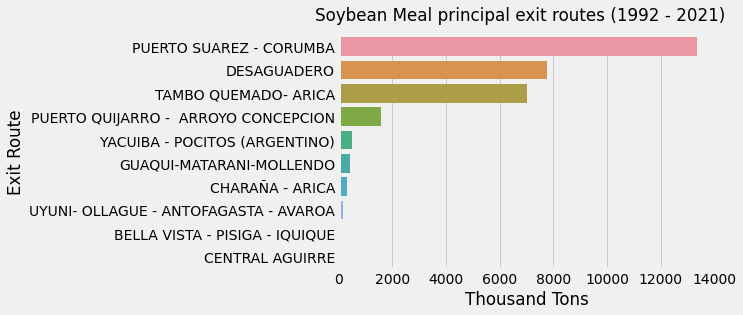

In [45]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESVIA', 'Soybean Meal')

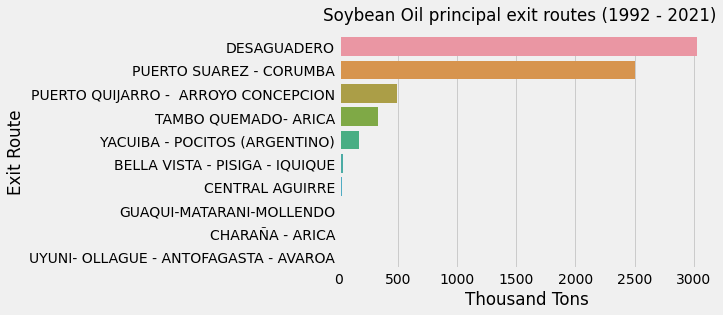

In [46]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESVIA', 'Soybean Oil')

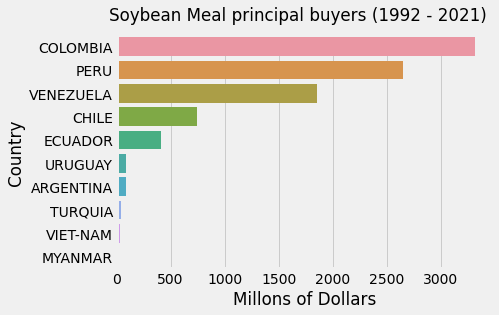

In [49]:
h_bar_plot(df_expo, 813, 'VALOR', 'DESPAIS', 'Soybean Meal')

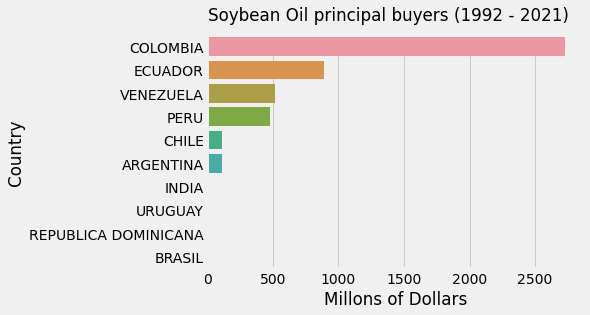

In [50]:
h_bar_plot(df_expo, 4211,'VALOR', 'DESPAIS', 'Soybean Oil')

utilizando la informacion disponible por paginas de mercado de valoores podemos hacer una comparacion de como se ha comportado el precio unitario en en bolivia 

In [56]:
df_aceite = pd.read_excel("./Datos históricos Futuros aceite de soja EE.UU.xlsx")
df_harina = pd.read_excel("./Datos históricos Futuros harina de soja EE.UU.xlsx")

In [57]:
df_aceite['Fecha'] = pd.to_datetime(df_aceite['Fecha'], format='%d.%m.%Y')
df_aceite = df_aceite.set_index('Fecha')
df_aceite = df_aceite.sort_index(ascending=True)
df_aceite = df_aceite['Precio']
df_aceite = df_aceite.to_frame()
df_aceite.head()

,Precio
Fecha,
1992-09-01,421.0
1992-10-01,418.0
1992-11-01,437.0
1992-12-01,436.0
1993-01-01,444.0


In [58]:
df_harina['Fecha'] = pd.to_datetime(df_harina['Fecha'], format='%d.%m.%Y')
df_harina = df_harina.set_index('Fecha')
df_harina = df_harina.sort_index(ascending=True)
df_harina = df_harina['Último']
df_harina = df_harina.to_frame()
df_harina = df_harina.rename(columns={"Último": "Precio"})
df_harina.head()

,Precio
Fecha,
1992-01-01,175.8
1992-02-01,174.1
1992-03-01,178.7
1992-04-01,172.9
1992-05-01,183.2


se crea la siguiente funcion para poder hacer una comparacion entre el precio historico y el precio unitario

In [59]:
def comm_line(df, cuci, col, nombre, df_1, primero, ultimo):
  df = df[(df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))
  df = df.groupby(['GESTION', 'MES'])['UNITARIO'].mean().reset_index()  
  df = df.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
  df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
  df = df.set_index('DATE') 

  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' international price evolution (1992 - 2022)')
  axes.plot(df.index, df['UNITARIO'], label='unit price')
  axes.plot(df_1.index[primero:ultimo], df_1['Precio'][primero:ultimo], label='international price')
  axes.legend()
  axes.set_xlabel('Year') 
  axes.set_ylabel('Dollars')
  return plt.show()

C:\Users\Windows\AppData\Local\Temp/ipykernel_35512/1323687544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


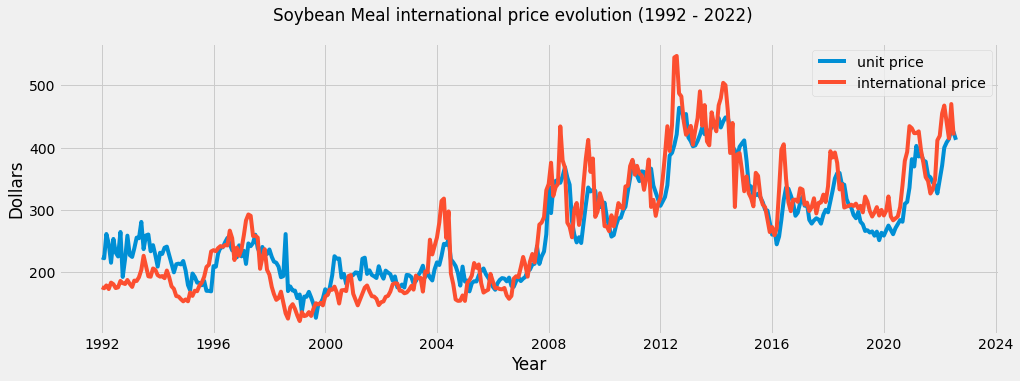

In [60]:
comm_line(df_expo, 813, 'VALOR', 'Soybean Meal', df_harina, 0, -3)

C:\Users\Windows\AppData\Local\Temp/ipykernel_35512/1323687544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


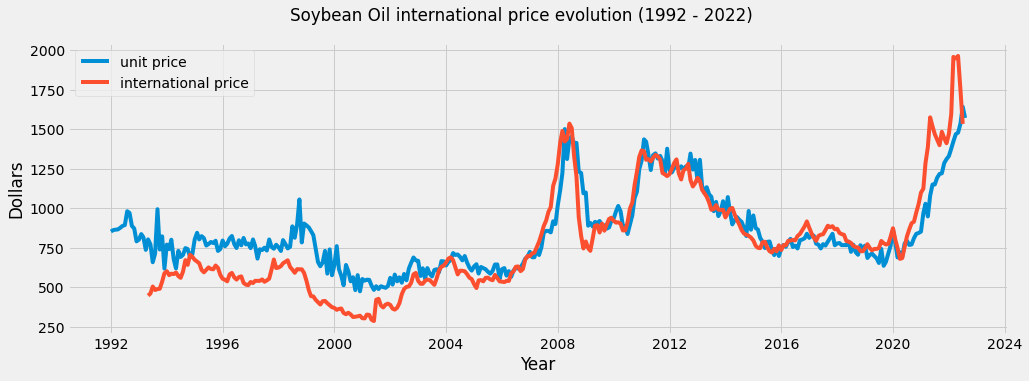

In [61]:
comm_line(df_expo, 4211, 'VALOR', 'Soybean Oil', df_aceite, 8, 360)